<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [50]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [52]:
df.set_index("Date", drop=True, inplace=True)

In [53]:
df = df[["Close"]]

In [54]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [55]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


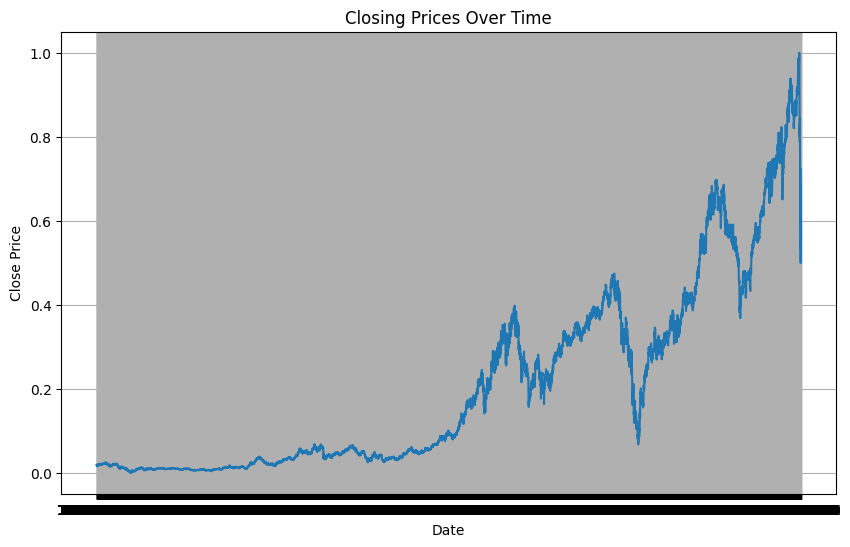

In [47]:
#Visualize
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [57]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [58]:
#Reshaping the 1D array to a 2D array with a single column
scaledData= df["Close"].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
df["Close"] = scaler.fit_transform(scaledData)

df.head()

<ipython-input-58-38b8d3b682a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = scaler.fit_transform(scaledData)


,Close
Date,
1972-06-01,0.018843
1972-06-02,0.018724
1972-06-05,0.018191
1972-06-06,0.016769
1972-06-07,0.016473


In [59]:
x = df.drop("Close", axis="columns") # (x is all columns except close)
y = df["Close"]

In [60]:

#splitting dataset into train and test
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [61]:
x_train.shape #80%

(9651, 0)

In [62]:
x_test.shape #20%

(2413, 0)

In [63]:
y_test[:5]

Date
2007-04-17    0.420526
2017-04-18    0.549764
1999-08-20    0.298623
1986-06-06    0.050306
2007-09-28    0.428847
Name: Close, dtype: float64

In [64]:
# Convert data in the form of a 3D array for our LSTM model.
# 60 timestep;12064 length of the data

x_train = []
y_train = []
for i in range(60, l):
    x_train.append(x_train[i-60:i, 0])
    y_train.append(x_train[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adding the batch_size axis

x_train.shape

NameError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

hist = model.fit(x_train,y_train,epochs=5,batch_size=32, verbose = 2)

#Model Evaluation

In [ ]:
plt.plot(hist.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#Converting test data to array
x_test = []
y_test = []
time_steps = 60

for i in range(time_steps, len(test_df)):
    x_test.append(test_df[i-time_steps:i, 0])
    y_test.append(test_df[i,0])

x_test = np.array(x_test), np.rray(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
length= len(df)
print(length)